## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results, on='Mouse ID', how='outer')
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
print(f"Mice count from merged DataFrame: {len(merged_df['Mouse ID'])}")
print(f"Unique Mice count from merged DataFrame: {len(merged_df['Mouse ID'].unique())}")


Mice count from merged DataFrame: 1893
Unique Mice count from merged DataFrame: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#dup_mice_df = mouse_metadata.loc[mouse_metadata.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

dup_mice_df = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mice_df

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
clean_mice_df = study_results[study_results['Mouse ID'].isin(dup_mice_df)==False]
clean_study_results = mouse_metadata[mouse_metadata['Mouse ID'].isin(dup_mice_df)==False]

duplicates_df = pd.merge(clean_mice_df, clean_study_results, on='Mouse ID')
duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='last')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
print(f"Mice count from clean DataFrame: {len(clean_df['Mouse ID'])}")
print(f"Unique Mice count from clean DataFrame: {len(clean_df['Mouse ID'].unique())}")

Mice count from clean DataFrame: 1888
Unique Mice count from clean DataFrame: 249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean_df = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
drug_med_df = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
drug_var_df = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
drug_std_df = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
drug_sem_df = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
single_summary_df = pd.DataFrame({"Mean":drug_mean_df, "Median":drug_med_df, "Variance":drug_var_df,
                            "Std. Dev.":drug_std_df, "SEM": drug_sem_df})
single_summary_df

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drug_group_df = clean_df.groupby('Drug Regimen')
agg_summary_df = drug_group_df.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

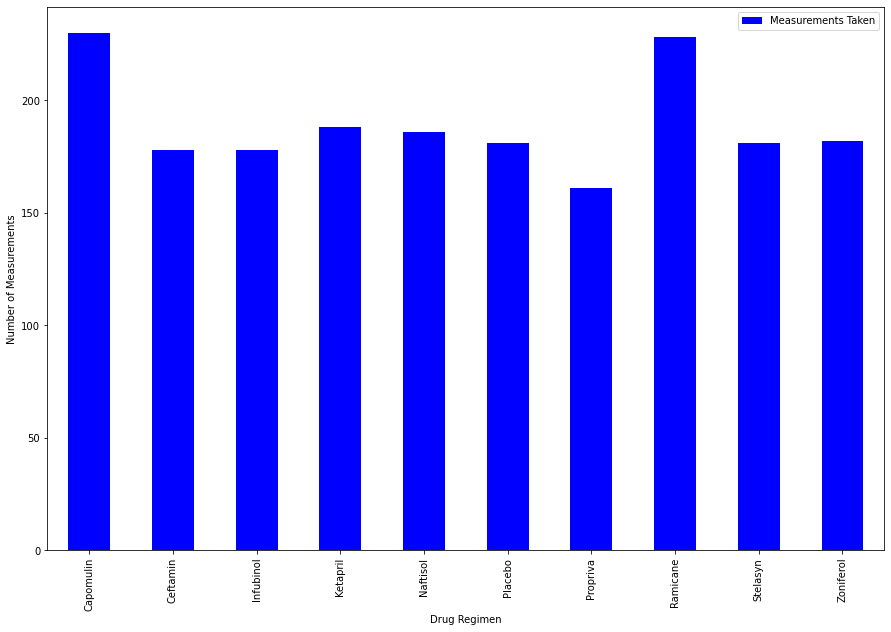

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug2_df = merged_df.groupby(['Drug Regimen'])
measure_count= drug2_df['Tumor Volume (mm3)'].count()


bar_df = pd.DataFrame({"Measurements Taken":measure_count})
#bar_df.head()

bar_plot = bar_df.plot(kind='bar', figsize=(15,10), color='b')
plt.ylabel("Number of Measurements")


In [38]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = len(drug2_df['Drug Regimen'])
measure_list = (merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].count()).tolist()
ticks_list = merged_df['Drug Regimen'].unique()
print(x_axis)
print(measure_list)
print(ticks_list)

#fig1, ax1 = plt.subplots(figsize=(15,10))
#plt.bar(x_axis,measure_list,color='b')

#xticks_loc = [value for value in x_axis]

#plt.xticks(x_axis,ticks_list,rotation='vertical')

#plt.show()


10
[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
